# Degrading the data

What happens when we lower the retirement limit of a galaxy? Can we still recover meaningful spiral arms?

This is the question we explore in this chapter: we take our 47 classifications and obtain samples of ten

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import groupPolylines
import spiralExtraction
import json

In [3]:
with open('classification-dump.json') as f: classifications = json.load(f)
with open('subject-dump.json') as f: subjects = json.load(f)
# print(json.dumps(list(cls[0]['links']['subjects']), indent=1))
index, _ = (next(iter(filter(
    lambda s: s[1] == '6ee8db8f-2a1e-4d10-bcb9-1e5ec84f8f10',
    ((i, list(s['locations'][0].items())[0][1].split('/')[-1].split('.')[0]) for i, s in enumerate(subjects))
))))

subjectId = subjects[index]['id']

classificationsOfSubject = list(filter(lambda c: c['links']['subjects'][0] == subjectId, classifications))
annotations = [c['annotations'] for c in classificationsOfSubject]
annotationsWithSpiral = [c[3]['value'][0]['value'] for c in annotations if len(c[3]['value'][0]['value'])]
spirals = [[a['points'] for a in c] for c in annotationsWithSpiral]
spiralsWithLengthCut = [
    [[[p['x'], p['y']] for p in a] for a in c]
    for c in spirals if all([len(a) > 5 for a in c])
]
drawnArms = np.array([np.array(arm) for classification in spiralsWithLengthCut for arm in classification])

In [4]:
np.random.seed(0)
classificationGroups = [np.random.choice(np.arange(len(annotations)), size=10, replace=False) for i in range(5)]

0
1
2
3
4


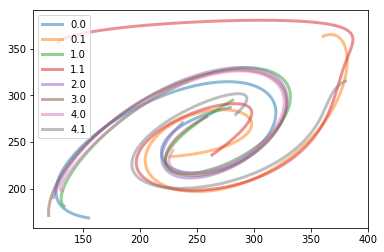

In [5]:
foo = []
for groupIndex, indices in enumerate(classificationGroups[:]):
    print(groupIndex)
    filteredAnnotations = [annotations[i] for i in indices]
    annotationsWithSpiral = [c[3]['value'][0]['value'] for c in filteredAnnotations if len(c[3]['value'][0]['value'])]
    spirals = [[a['points'] for a in c] for c in annotationsWithSpiral]
    spiralsWithLengthCut = [
        [[[p['x'], p['y']] for p in a] for a in c]
        for c in spirals if all([len(a) > 5 for a in c])
    ]
    drawnArms = np.array([np.array(arm) for classification in spiralsWithLengthCut for arm in classification])
    t = np.linspace(0, 1, 1000)
    functions = spiralExtraction.fit(drawnArms, verbose=False)
    foo.append(functions)
    for i, (Sx, Sy) in enumerate(functions):
        plt.plot((Sx(t) + 0.5) * 512, (Sy(t) + 0.5) * 512, linewidth=3, alpha=0.5, label="{}.{}".format(groupIndex, i))
        
plt.legend()